# Problem description


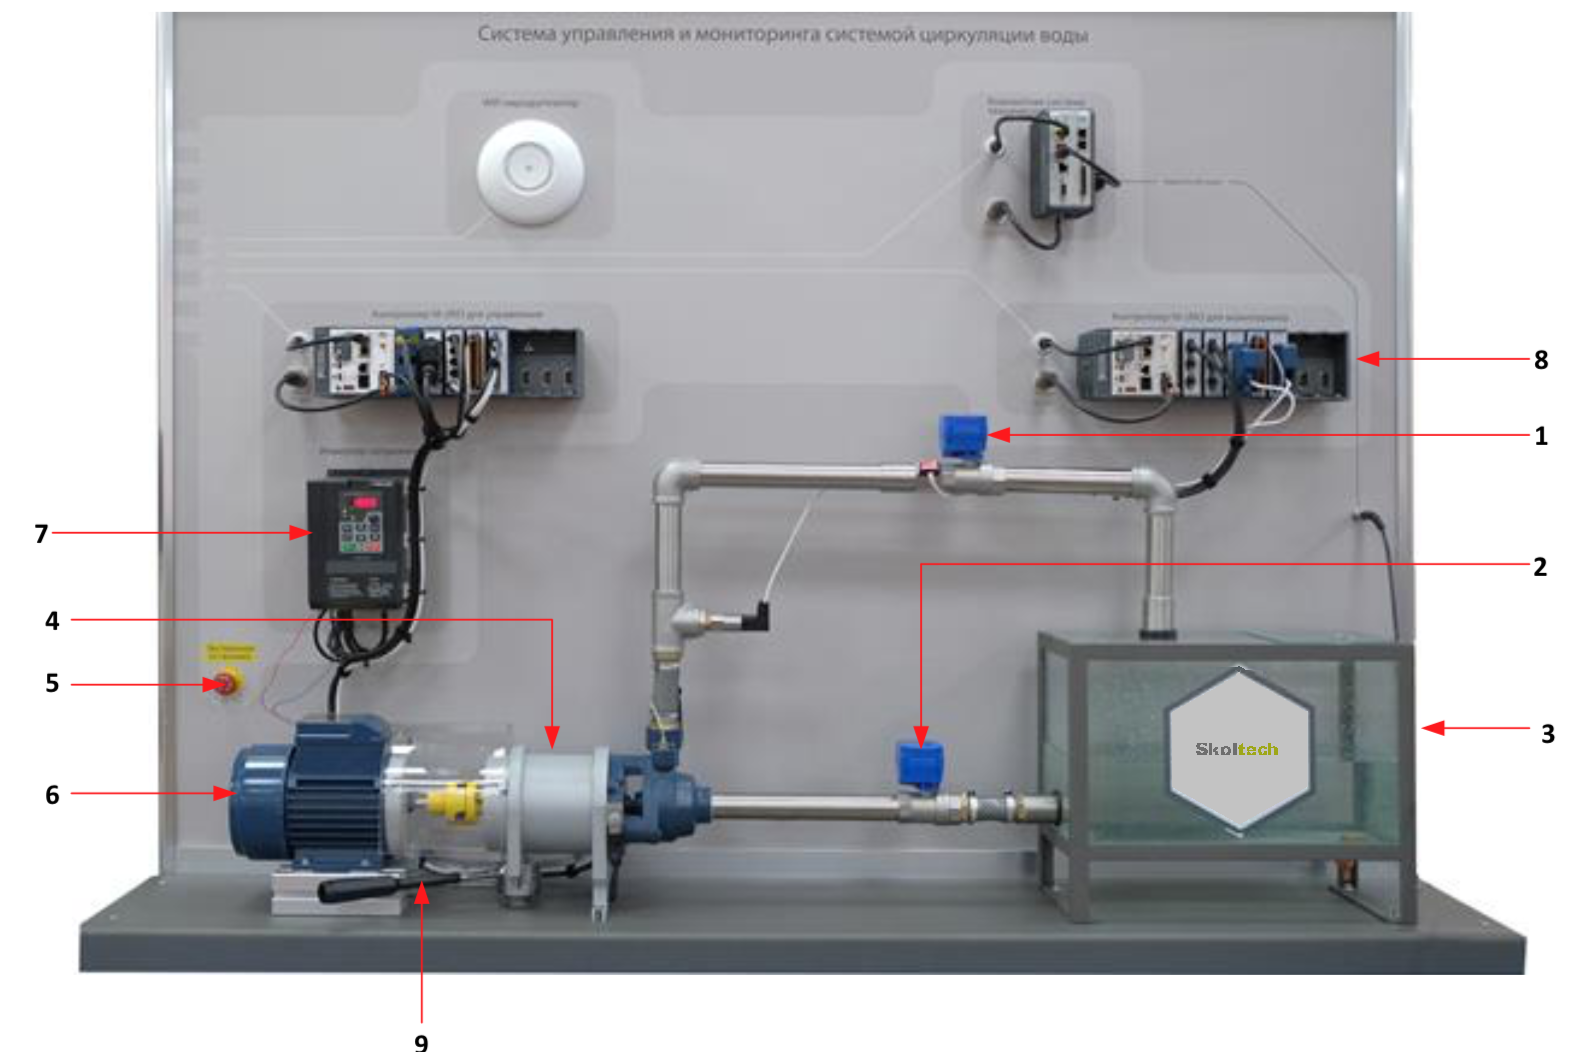

Front panel and composition of the water circulation, control and monitoring systems: 1,2 - solenoid valve (amount - 1); 3 - a tank with water (1); 4 - a water pump (1); 5 - emergency stop button (1); 6 - electric motor (1); 7 - inverter (1); 8 - compactRIO (1); 9 - a mechanical lever for shaft misalignment (1). Not shown parts - vibration sensor (2); pressure meter (1); flow meter (1); thermocouple (2).

## Load Data

In [232]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import os

valve2 - Data obtained from the experiments with closing the valve at the flow inlet to the pump.

In [250]:
df0=pd.read_csv(os.getcwd()+"\data\0.csv",sep=';',index_col='datetime',parse_dates=True)
df1=pd.read_csv(os.getcwd()+"\data\1.csv",sep=';',index_col='datetime',parse_dates=True)
df2=pd.read_csv(os.getcwd()+"\data\2.csv",sep=';',index_col='datetime',parse_dates=True)
df3=pd.read_csv(os.getcwd()+"\data\3.csv",sep=';',index_col='datetime',parse_dates=True)

In [251]:
df=pd.concat([df0, df1, df2, df3])
df.shape

(4312, 10)

In [5]:
anomaly_free_df = pd.read_csv("C:/Users/XML/tsa/SKAB/data/anomaly-free/anomaly-free.csv", sep=';', index_col='datetime',  parse_dates=True)
anomaly_free_df.shape

(9405, 8)

## Data description
Columns in each data file are following:
* datetime - Represents dates and times of the moment when the value is written to the database (YYYY-MM-DD hh:mm:ss)
* Accelerometer1RMS - Shows a vibration acceleration (Amount of g units)
* Accelerometer2RMS - Shows a vibration acceleration (Amount of g units)
* Current - Shows the amperage on the electric motor (Ampere)
* Pressure - Represents the pressure in the loop after the water pump (Bar)
* Temperature - Shows the temperature of the engine body (The degree Celsius)
* Thermocouple - Represents the temperature of the fluid in the circulation loop (The degree Celsius)
* Voltage - Shows the voltage on the electric motor (Volt)
* RateRMS - Represents the circulation flow rate of the fluid inside the loop (Liter per minute)
* anomaly - Shows if the point is anomalous (0 or 1)
* changepoint - Shows if the point is a changepoint for collective anomalies (0 or 1)

# Data visualisation


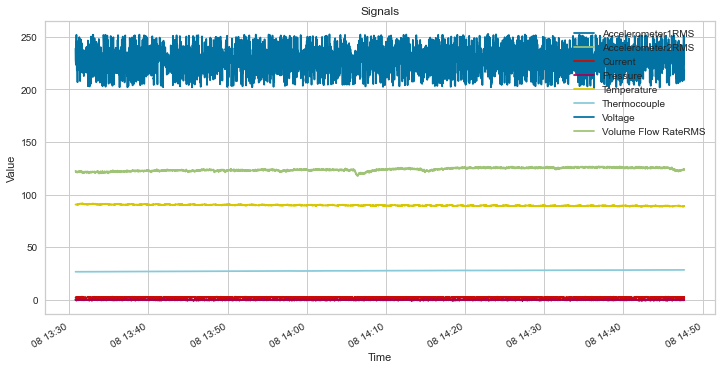

In [7]:
# anomaly_free dataset visualizing
anomaly_free_df.iloc[:4312].plot(figsize=(12,6))
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Signals')
plt.show()

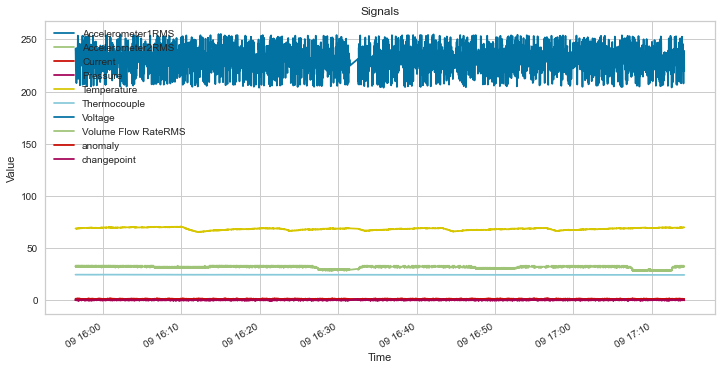

In [6]:
# valve2 dataset visualizing
df.plot(figsize=(12,6))
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Signals')
plt.show()


### Anomaly and changepoint visualisation

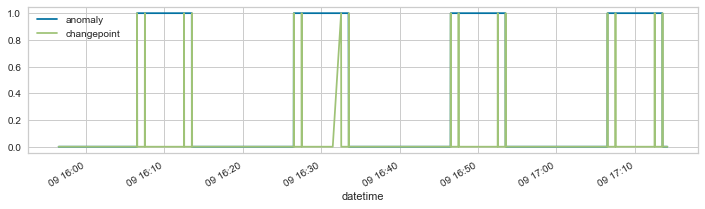

In [8]:
# plotting the labels both for outlier and changepoint detection problems
df.anomaly.plot(figsize=(12,3))
df.changepoint.plot()
plt.legend()
plt.show()

### Describe the dataset

In [9]:
# valve2
display(df.iloc[:,:-2].describe().T)

,count,mean,std,min,25%,50%,75%,max
Accelerometer1RMS,4312.0,0.027590,0.000356,0.026455,0.027342,0.027594,0.027826,0.031339
Accelerometer2RMS,4312.0,0.039766,0.001214,0.036098,0.038914,0.039785,0.040611,0.043516
Current,4312.0,0.970380,0.270512,0.383591,0.742731,0.982597,1.199380,1.546680
Pressure,4312.0,0.055091,0.264234,-0.929070,0.054711,0.054711,0.054711,1.038490
Temperature,4312.0,68.279706,1.072908,65.089000,67.501650,68.411200,69.088300,70.474800
Thermocouple,4312.0,24.236979,0.073683,24.096200,24.173300,24.235250,24.290025,24.402800
Voltage,4312.0,230.707104,10.788026,203.658000,224.763750,230.946500,237.024750,255.169000
Volume Flow RateRMS,4312.0,31.553337,1.175634,28.000000,31.040900,32.000000,32.000000,33.000000


In [10]:
# anomaly_free
display(anomaly_free_df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Accelerometer1RMS,9405.0,0.212604,0.004740,0.188217,0.210723,0.213092,0.215540,0.227198
Accelerometer2RMS,9405.0,0.268407,0.003989,0.248062,0.265510,0.267368,0.271630,0.279921
Current,9405.0,2.403010,0.486469,0.855284,2.129560,2.541890,2.728770,3.241530
Pressure,9405.0,0.111266,0.253332,-1.257000,0.054711,0.054711,0.382638,1.366420
Temperature,9405.0,89.472308,0.667109,88.171300,88.954100,89.351500,89.861700,91.724900
Thermocouple,9405.0,28.474310,0.730734,26.850800,27.916700,28.640400,29.113700,29.522100
Voltage,9405.0,228.647173,10.980578,201.365000,222.623000,228.932000,234.926000,252.806000
Volume Flow RateRMS,9405.0,125.237471,1.605327,118.000000,124.000000,125.677000,126.328000,128.353000


## Check for stationaty

In [125]:
vf_df=df[['Volume Flow RateRMS']]

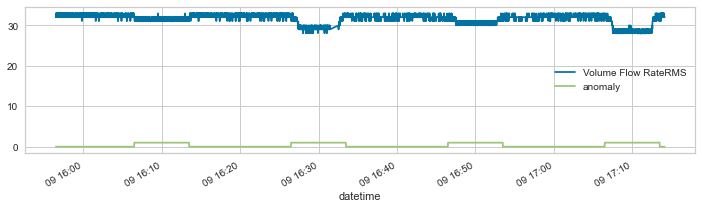

In [126]:
vf_df.plot(figsize=(12,3))
df.anomaly.plot()
plt.legend()
plt.show()

In [127]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic", # the more negative, the more stationary
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)
    
    
adf_test(vf_df['Volume Flow RateRMS'])

Results of Dickey-Fuller Test:
Test Statistic                   -2.537673
p-value                           0.106575
#Lags Used                       11.000000
Number of Observations Used    4300.000000
Critical Value (1%)              -3.431872
Critical Value (5%)              -2.862212
Critical Value (10%)             -2.567128
dtype: float64


p-value is larger than 0.05, which means it is not stationary

## Transform the data to stationary

In [128]:
raw_series=vf_df['Volume Flow RateRMS'].tolist()
def diff(series):
    for i in range(len(series)-1,0,-1):
        series[i]=series[i]-series[i-1]
    return series
first_order = [0]
first_order.extend(diff(raw_series)[1:])
len(first_order)

4312

In [129]:
vf_df['first_order']=first_order
vf_df

,Volume Flow RateRMS,first_order
datetime,,
2020-03-09 15:56:30,32.0362,0.0000
2020-03-09 15:56:31,32.9649,0.9287
2020-03-09 15:56:32,32.0362,-0.9287
2020-03-09 15:56:33,32.9649,0.9287
2020-03-09 15:56:34,32.0000,-0.9649
...,...,...
2020-03-09 17:14:04,32.0451,0.0451
2020-03-09 17:14:05,32.9562,0.9111
2020-03-09 17:14:07,32.0000,-0.9562


In [130]:
adf_test(vf_df['first_order'])

Results of Dickey-Fuller Test:
Test Statistic                  -29.036650
p-value                           0.000000
#Lags Used                       10.000000
Number of Observations Used    4301.000000
Critical Value (1%)              -3.431871
Critical Value (5%)              -2.862212
Critical Value (10%)             -2.567128
dtype: float64


In [131]:
vf_df=vf_df.drop(columns=['Volume Flow RateRMS'])
vf_df=vf_df.rename(columns={'first_order': 'Volume Flow RateRMS'})
vf_df

,Volume Flow RateRMS
datetime,
2020-03-09 15:56:30,0.0000
2020-03-09 15:56:31,0.9287
2020-03-09 15:56:32,-0.9287
2020-03-09 15:56:33,0.9287
2020-03-09 15:56:34,-0.9649
...,...
2020-03-09 17:14:04,0.0451
2020-03-09 17:14:05,0.9111
2020-03-09 17:14:07,-0.9562


# Heuristic method

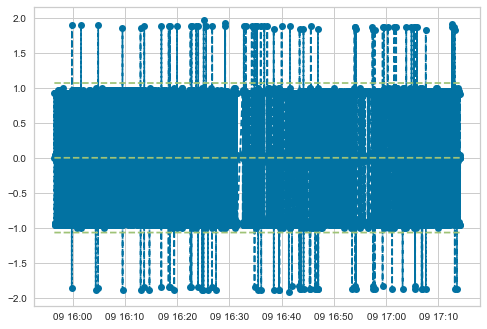

In [148]:
m=vf_df['Volume Flow RateRMS'].mean()
std=vf_df['Volume Flow RateRMS'].std()
mean_line=np.ones((4312,))*m
std_up=np.ones((4312,))*m+2*std
std_low=np.ones((4312,))*m-2*std

plt.plot_date(vf_df.index, vf_df['Volume Flow RateRMS'], linestyle='--')
plt.plot(vf_df.index,mean_line, linestyle='dashed')
plt.plot(vf_df.index,std_up, linestyle='dashed',color='g')
plt.plot(vf_df.index,std_low, linestyle='dashed',color='g')

In [149]:
cut_off=2*std
anomaly_df=vf_df['Volume Flow RateRMS'][abs(vf_df['Volume Flow RateRMS']-m)>cut_off]
anomaly_df

datetime
2020-03-09 15:59:50   -1.8554
2020-03-09 15:59:51    1.8899
2020-03-09 16:01:36    1.8899
2020-03-09 16:04:25   -1.8917
2020-03-09 16:04:52   -1.8534
                        ...  
2020-03-09 17:12:36    1.9082
2020-03-09 17:13:00    1.8646
2020-03-09 17:13:06    1.8221
2020-03-09 17:13:07   -1.8686
2020-03-09 17:13:32   -1.8686
Name: Volume Flow RateRMS, Length: 110, dtype: float64

In [202]:
df['heu_pred'] = np.zeros(4312)
df['ref']=[x for x in range(4312)]
df.head()

,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint,heu_pred,ref
datetime,,,,,,,,,,,,
2020-03-09 15:56:30,0.027608,0.039203,1.290480,0.054711,68.6194,24.3670,241.062,32.0362,0.0,0.0,0.0,0
2020-03-09 15:56:31,0.027166,0.039940,1.285650,0.382638,68.5923,24.3660,238.709,32.9649,0.0,0.0,0.0,1
2020-03-09 15:56:32,0.027718,0.040167,1.155880,0.054711,68.5207,24.3666,226.485,32.0362,0.0,0.0,0.0,2
2020-03-09 15:56:33,0.028045,0.038026,0.971268,0.382638,68.5425,24.3634,220.378,32.9649,0.0,0.0,0.0,3
2020-03-09 15:56:34,0.027644,0.038580,1.072460,-0.273216,68.6569,24.3639,233.922,32.0000,0.0,0.0,0.0,4


In [219]:
ref_ind=[]
ano_ind=anomaly_df.index.tolist()
df_ind=df.index.tolist()
for i in range(len(df_ind)):
    if df_ind[i] in ano_ind:
        ref_ind.append(i)
temp=[0 for x in range(4312)]
for i in ref_ind:
    temp[i]=1
df['heu_pred'] = temp

In [220]:
df.head()

,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint,heu_pred
datetime,,,,,,,,,,,
2020-03-09 15:56:30,0.027608,0.039203,1.290480,0.054711,68.6194,24.3670,241.062,32.0362,0.0,0.0,0
2020-03-09 15:56:31,0.027166,0.039940,1.285650,0.382638,68.5923,24.3660,238.709,32.9649,0.0,0.0,0
2020-03-09 15:56:32,0.027718,0.040167,1.155880,0.054711,68.5207,24.3666,226.485,32.0362,0.0,0.0,0
2020-03-09 15:56:33,0.028045,0.038026,0.971268,0.382638,68.5425,24.3634,220.378,32.9649,0.0,0.0,0
2020-03-09 15:56:34,0.027644,0.038580,1.072460,-0.273216,68.6569,24.3639,233.922,32.0000,0.0,0.0,0


In [136]:
def evaluate(pred,true):
    TP=0
    TN=0
    FP=0
    FN=0
    for i in range(len(pred)):
        if pred[i]==0:
            if labels[i]==0:
                TN+=1
            else:
                FN+=1
        else:
            if labels[i]==0:
                FP+=1
            else:
                TP+=1
    print('TP =',TP,' TN =',TN,' FP =',FP,' FN =',FN)
    return TP,TN,FP,FN

In [221]:
pred_heu=df.heu_pred.tolist()
labels=df.anomaly.tolist()

In [223]:
TP,TN,FP,FN=evaluate(pred_heu,labels)
print('accuracy =',(TP+TN)/4312)

TP = 25  TN = 2710  FP = 85  FN = 1492
accuracy = 0.6342764378478665


In [153]:
import plotly.graph_objects as go
import plotly.express as px
# plot value on y-axis and date on x-axis
fig = px.line(iforest_results, x=df.index, y=df['Volume Flow RateRMS'], title='NYC TAXI TRIPS - UNSUPERVISED ANOMALY DETECTION', template = 'plotly_dark')
# create list of outlier_dates
outlier_dates = anomaly_df.index
# obtain y value of anomalies to plot
y_values = [df.loc[i]['Volume Flow RateRMS'] for i in outlier_dates]

label_dates=df[df['anomaly'] == 1].index
tru_ano=[df.loc[i]['Volume Flow RateRMS'] for i in label_dates]

fig.add_trace(go.Scatter(x=outlier_dates, y=y_values, mode = 'markers', 
                name = 'Anomaly predicted', 
                marker=dict(color='red',size=10)))

fig.add_trace(go.Scatter(x=label_dates, y=tru_ano, mode = 'markers', 
                name = 'Anomaly real', 
                marker=dict(color='yellow',size=5)))
fig.show()

# Isolation Forest

This method, I follow the steps in the tutorial provided by the Pycaret documentation, details can be seen in https://github.com/pycaret/pycaret/blob/master/tutorials/Anomaly%20Detection%20Tutorial%20Level%20Beginner%20-%20ANO101.ipynb

In [132]:
from pycaret.anomaly import *
setup = setup(vf_df, session_id = 123)

,Description,Value
0,session_id,123
1,Original Data,"(4312, 1)"
2,Missing Values,0
3,Numeric Features,1
4,Categorical Features,0
5,Ordinal Features,0
6,High Cardinality Features,0
7,High Cardinality Method,None
8,Transformed Data,"(4312, 1)"
9,CPU Jobs,-1


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='UNSUPERVISED_DUMMY_TARGET',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categorical=None,
                                fill_value_numerical=None...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
        

In [133]:
iforest = create_model('iforest')
print(iforest)

INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=123, verbose=0)
INFO:logs:create_model() succesfully completed......................................


IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=123, verbose=0)


In [134]:
iforest_results = assign_model(iforest)
iforest_results.head()

INFO:logs:Initializing assign_model()
INFO:logs:assign_model(model=IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=123, verbose=0), transformation=False, score=True, verbose=True)
INFO:logs:Checking exceptions
INFO:logs:Determining Trained Model
INFO:logs:Trained Model : Isolation Forest
INFO:logs:Copying data
INFO:logs:(4312, 3)
INFO:logs:assign_model() succesfully completed......................................


,Volume Flow RateRMS,Anomaly,Anomaly_Score
datetime,,,
2020-03-09 15:56:30,0.0000,0,-0.250451
2020-03-09 15:56:31,0.9287,0,-0.152669
2020-03-09 15:56:32,-0.9287,0,-0.151229
2020-03-09 15:56:33,0.9287,0,-0.152669
2020-03-09 15:56:34,-0.9649,0,-0.143607


In [225]:
pred_if=iforest_results.Anomaly.tolist()

In [226]:
TP,TN,FP,FN=evaluate(pred_if,labels)
print('accuracy =',(TP+TN)/4312)

TP = 44  TN = 2651  FP = 144  FN = 1473
accuracy = 0.625


In [145]:
import plotly.graph_objects as go
import plotly.express as px
# plot value on y-axis and date on x-axis
fig = px.line(iforest_results, x=df.index, y=df['Volume Flow RateRMS'], title='NYC TAXI TRIPS - UNSUPERVISED ANOMALY DETECTION', template = 'plotly_dark')
# create list of outlier_dates
outlier_dates = iforest_results[iforest_results['Anomaly'] == 1].index
# obtain y value of anomalies to plot
y_values = [df.loc[i]['Volume Flow RateRMS'] for i in outlier_dates]

label_dates=df[df['anomaly'] == 1].index
tru_ano=[df.loc[i]['Volume Flow RateRMS'] for i in label_dates]

fig.add_trace(go.Scatter(x=outlier_dates, y=y_values, mode = 'markers', 
                name = 'Anomaly predicted', 
                marker=dict(color='red',size=10)))

fig.add_trace(go.Scatter(x=label_dates, y=tru_ano, mode = 'markers', 
                name = 'Anomaly real', 
                marker=dict(color='yellow',size=5)))
fig.show()

# Histogram based

In [139]:
from pycaret.anomaly import *
s = setup(vf_df, session_id = 42)

,Description,Value
0,session_id,42
1,Original Data,"(4312, 1)"
2,Missing Values,0
3,Numeric Features,1
4,Categorical Features,0
5,Ordinal Features,0
6,High Cardinality Features,0
7,High Cardinality Method,None
8,Transformed Data,"(4312, 1)"
9,CPU Jobs,-1


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='UNSUPERVISED_DUMMY_TARGET',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categorical=None,
                                fill_value_numerical=None...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
        

In [140]:
histogram = create_model('histogram')
histogram_results = assign_model(histogram)
histogram_results.head()

INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:HBOS(alpha=0.1, contamination=0.05, n_bins=10, tol=0.5)
INFO:logs:create_model() succesfully completed......................................
INFO:logs:Initializing assign_model()
INFO:logs:assign_model(model=HBOS(alpha=0.1, contamination=0.05, n_bins=10, tol=0.5), transformation=False, score=True, verbose=True)
INFO:logs:Checking exceptions
INFO:logs:Determining Trained Model
INFO:logs:Trained Model : Histogram-based Outlier Detection
INFO:logs:Copying data
INFO:logs:(4312, 3)
INFO:logs:assign_model() succesfully completed......................................


,Volume Flow RateRMS,Anomaly,Anomaly_Score
datetime,,,
2020-03-09 15:56:30,0.0000,0,-0.163439
2020-03-09 15:56:31,0.9287,0,0.495691
2020-03-09 15:56:32,-0.9287,0,0.485994
2020-03-09 15:56:33,0.9287,0,0.495691
2020-03-09 15:56:34,-0.9649,0,0.485994


In [227]:
pred_hist=histogram_results.Anomaly.tolist()
TP,TN,FP,FN=evaluate(pred_hist,labels)
print('accuracy =',(TP+TN)/4312)

TP = 25  TN = 2710  FP = 85  FN = 1492
accuracy = 0.6342764378478665


In [146]:
# plot value on y-axis and date on x-axis
fig = px.line(histogram_results, x=df.index, y=df['Volume Flow RateRMS'], title='NYC TAXI TRIPS - UNSUPERVISED ANOMALY DETECTION', template = 'plotly_dark')
# create list of outlier_dates
outlier_dates = histogram_results[histogram_results['Anomaly'] == 1].index
# obtain y value of anomalies to plot
y_values = [df.loc[i]['Volume Flow RateRMS'] for i in outlier_dates]

label_dates=df[df['anomaly'] == 1].index
tru_ano=[df.loc[i]['Volume Flow RateRMS'] for i in label_dates]

fig.add_trace(go.Scatter(x=outlier_dates, y=y_values, mode = 'markers', 
                name = 'Anomaly predicted', 
                marker=dict(color='red',size=10)))
fig.add_trace(go.Scatter(x=label_dates, y=tru_ano, mode = 'markers', 
                name = 'Anomaly real', 
                marker=dict(color='yellow',size=6)))
        
fig.show()

# Heurestic method with Prophet

In [81]:
# select voltage as an example
voltage_df=df[['Voltage']]
voltage_df

,Voltage
datetime,
2020-03-09 15:56:30,241.062
2020-03-09 15:56:31,238.709
2020-03-09 15:56:32,226.485
2020-03-09 15:56:33,220.378
2020-03-09 15:56:34,233.922
...,...
2020-03-09 17:14:04,237.276
2020-03-09 17:14:05,230.729
2020-03-09 17:14:07,233.443


### Modify the dateframe to be able to fit with the Prophet model

This step, I followed the instructions by the Prophet documentation. Details can be seen from https://facebook.github.io/prophet/docs/outliers.html 

However, the result does not make sence in this case.

In [82]:
voltage_df['ds'] = voltage_df.index
voltage_df=voltage_df.reset_index(drop=True)
voltage_df = voltage_df.rename(columns={"Voltage":"y"})
voltage_df=voltage_df[['ds','y']]
voltage_df

,ds,y
0,2020-03-09 15:56:30,241.062
1,2020-03-09 15:56:31,238.709
2,2020-03-09 15:56:32,226.485
3,2020-03-09 15:56:33,220.378
4,2020-03-09 15:56:34,233.922
...,...,...
4307,2020-03-09 17:14:04,237.276
4308,2020-03-09 17:14:05,230.729
4309,2020-03-09 17:14:07,233.443
4310,2020-03-09 17:14:08,238.930


### Fit and predict

In [83]:
from fbprophet import Prophet
m=Prophet()
m.fit(voltage_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


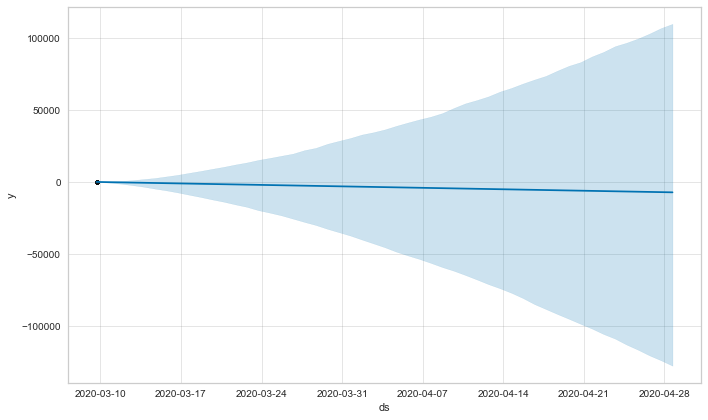

In [84]:
future = m.make_future_dataframe(periods=50)
forecast = m.predict(future)
fig = m.plot(forecast)